# SVM Assignment2 (피드백 참고 수정본)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Anomaly detection(사기감지 데이터) 로드
data = pd.read_csv('creditcard.csv')
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
X = data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = data[['Class']]

In [4]:
y['Class'].value_counts()

0    284314
1       492
Name: Class, dtype: int64

In [5]:
#데이터 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [6]:
#down-sampling
#imbalanced data를 balanced data로 바꾸기 위해서 
#downsampling을 사용했습니다 이때는 resample함수를 사용하였습니다!

from sklearn.utils import resample
X = pd.concat([X_train,y_train],axis=1)

Class_0 = X[X.Class==0]
Class_1 = X[X.Class==1]

Class_0_downsampled = resample(Class_0,
                              replace = False,
                              n_samples = len(Class_1),
                              random_state = 28)

downsampled = pd.concat([Class_0_downsampled,Class_1])

downsampled.Class.value_counts() #확인결과 데이터 개수가 어느정도 balance하게 되었음을 확인할 수 있습니다


1    383
0    383
Name: Class, dtype: int64

In [7]:
X = downsampled[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = downsampled[['Class']]

In [8]:
y['Class'].value_counts()

1    383
0    383
Name: Class, dtype: int64

피드백보고 데이터 split하는 단계와 scaling하는 단계 수정했습니다!

In [9]:
#데이터 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [10]:
#scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)


In [11]:
from sklearn.metrics.pairwise import rbf_kernel 

이러한 데이터는 낮은 gamma와 낮은 C에서 좋은 성능을 보인다는 피드백 참고하여
원래 100으로 설정하였던 C의 값을 10으로 변경하였고 0.92->0.97로 accuracy 높였습니다!

In [12]:
from sklearn import metrics #model evaluation하는 라이브러리

sample_weights = np.ones((X_train.shape[0])) / X_train.shape[0]
#linear kernel 사용
svc=SVC(kernel='linear',C=10) # 리니어 모델로
svc.fit(X_train_s,y_train, sample_weights*10) # 모델 훈련 
y_pred=svc.predict(X_test_s) # 훈련한 모델로 test셋을 시험해보자
print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred)) #스코어 확인
#accuracy: 0.97

Accuracy Score:
0.974025974025974


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn import metrics #model evaluation하는 라이브러리

#sample_weights = np.ones((X_train.shape[0])) / X_train.shape[0]
#제가 모델 훈련 진행할 때 down sampling 한 대신 데이터에 weight를 주려고 시도를 해봤는데 weight를 주지 않는 게 더 높은 accuracy 나오더라고요...!
#그래서 weight 주지않고 그냥 진행했습니다

svc=SVC(kernel='linear') # 리니어 모델로해보자
svc.fit(X_train_s,y_train) # 모델 훈련 중...
y_pred=svc.predict(X_test_s) # 훈련한 모델로 test셋을 시험해보자
print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred)) #스코어 확인

Accuracy Score:
0.974025974025974


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
svc_rbf=SVC(kernel='rbf', gamma = 0.1) #rbf커널로!
svc_rbf.fit(X_train_s,y_train) # 모델트리이닝
y_pred=svc_rbf.predict(X_test_s)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))
#accuracy: 0.97

Accuracy Score:
0.9675324675324676


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from tqdm import tqdm #  for문이 아주 길 때 내가 코드가 잘못돼서 무한루프 도는지 원래 오래걸리는지 for문이 얼마나 남았는지 계산

from sklearn.model_selection import cross_validate
C_range=list(np.arange(1,80,1)) # C값은 1부터 80까지 1간격으로 하자
acc_score = [] # 결과를 보관할 list

#cross validation
for c in tqdm(C_range): # tqdm사용 - 돌아가고있음을 확인가능
    svc = SVC(kernel='rbf', C=c, gamma = 'scale') #gamma에 디포트 값을 scale로
    scores = cross_validate(svc, X_test_s, y_test, cv=10, scoring='accuracy') # 점수를 리스트로 관리해줍니다.
    score = np.mean(scores['test_score']) #10개 스코어 값의 평균
    acc_score.append(score) 
print(np.max(acc_score)) #제일 좋은 결과 : 0.9675
print(C_range[np.argmax(acc_score)]) #제일 좋은 결과가 나온 파라미터: 7

  0%|                                                                                           | 0/79 [00:00<?, ?it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 28%|██████████████████████▊                                                           | 22/79 [00:01<00:03, 15.34it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 35%|█████████████████████████████                                                     | 28/79 [00:01<00:03, 15.01it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 71%|██████████████████████████████████████████████████████████▏                       | 56/79 [00:03<00:01, 16.07it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 78%|████████████████████████████████████████████████████████████████▎                 | 62/79 [00:03<00:01, 15.81it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

0.9675
7


Text(0, 0.5, 'Cross-Validated Accuracy')

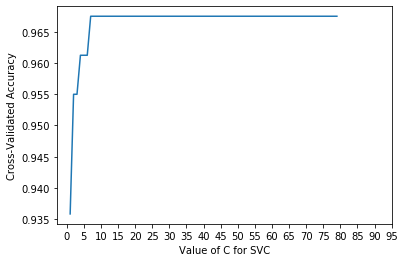

In [16]:
#커질수록 떨어진다
C_range=list(np.arange(1,80,1))
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,100,5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [17]:
C_range=list(np.arange(1,30,0.1))
acc_score = []
for c in tqdm(C_range):
    svc = SVC(kernel='rbf',gamma = 'scale', C=c)
    svc.fit(X_train_s,y_train)
    scores = cross_validate(svc, X_test_s, y_test, cv=10, scoring='accuracy') # 점수를 리스트로 관리해줍니다.
    score = np.mean(scores['test_score']) #10개 스코어 값의 평균
    acc_score.append(score) 
print(np.max(acc_score)) #제일 좋은 결과
print(C_range[np.argmax(acc_score)]) #제일 좋은 결과가 나온 파라미터
#제일 좋은 결과: 0.9675
#제일 좋은 결과가 나온 파라미터: 6.4

  0%|                                                                                          | 0/290 [00:00<?, ?it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  7%|█████▌                                                                           | 20/290 [00:01<00:19, 13.59it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 12%|█████████▍                                                                       | 34/290 [00:02<00:22, 11.33it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 17%|█████████████▍                                                                   | 48/290 [00:03<00:21, 11.49it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 21%|█████████████████▎                                                               | 62/290 [00:04<00:18, 12.35it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 28%|██████████████████████▉                                                          | 82/290 [00:06<00:18, 11.55it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 33%|██████████████████████████▊                                                      | 96/290 [00:07<00:17, 11.36it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 38%|██████████████████████████████▎                                                 | 110/290 [00:09<00:16, 10.91it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 43%|██████████████████████████████████▏                                             | 124/290 [00:10<00:14, 11.82it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 50%|███████████████████████████████████████▋                                        | 144/290 [00:12<00:12, 11.33it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 54%|███████████████████████████████████████████▌                                    | 158/290 [00:13<00:11, 11.87it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 59%|███████████████████████████████████████████████▍                                | 172/290 [00:14<00:10, 11.77it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 64%|███████████████████████████████████████████████████▎                            | 186/290 [00:15<00:09, 11.35it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 71%|████████████████████████████████████████████████████████▊                       | 206/290 [00:17<00:07, 11.75it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 76%|████████████████████████████████████████████████████████████▋                   | 220/290 [00:18<00:06, 11.24it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 81%|████████████████████████████████████████████████████████████████▌               | 234/290 [00:19<00:04, 11.40it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 86%|████████████████████████████████████████████████████████████████████▍           | 248/290 [00:21<00:03, 11.25it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 92%|█████████████████████████████████████████████████████████████████████████▉      | 268/290 [00:22<00:01, 11.44it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 97%|█████████████████████████████████████████████████████████████████████████████▊  | 282/290 [00:24<00:00, 11.59it/s]C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversion

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

0.9675
6.400000000000005


Text(0, 0.5, 'Accuracy')

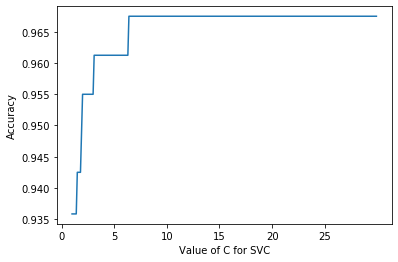

In [18]:
# 각 하이퍼 파라미터 별로 값이 얼만지 그려서 확인해보자
C_range=list(np.arange(1,30,0.1))
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,30,5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Accuracy')

In [19]:
C_range[np.argmax(acc_score)]

6.400000000000005

In [20]:
tuned_parameters = {
 'C': (np.arange(6,8,0.2)), 'kernel': ['linear'],
 'C': (np.arange(6,8,0.2)), 'gamma': (np.arange(1,10,0.1)), 'kernel': ['rbf']
                   }

In [21]:
from sklearn.model_selection import GridSearchCV
svm_model= SVC()
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy', verbose = 3)

In [22]:
model_svm.fit(X_train_s, y_train)
print(model_svm.best_score_)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=6.0, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.0, kernel=rbf, score=0.758, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=6.0, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.0, kernel=rbf, score=0.790, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=6.0, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.0, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.0, kernel=rbf, score=0.803, total=   0.1s
[CV] C=6.0, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.0, kernel=rbf, score=0.820, total=   0.1s
[CV] C=6.0, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.0, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.0, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.0, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.0, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.0, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.0, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.0, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.0, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.0, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.1, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.0, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.1, kernel=rbf, score=0.790, total=   0.0s
[CV] C=6.0, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.0, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.0, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.0, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.1, kernel=rbf, score=0.803, total=   0.1s
[CV] C=6.0, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.1, kernel=rbf, score=0.738, total=   0.1s
[CV] C=6.0, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.1, kernel=rbf, score=0.738, total=   0.1s
[CV] C=6.0, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.1, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.0, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.0, gamma=1.1, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.0, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.2000000000000002, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.0, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.2000000000000002, kernel=rbf, score=0.790, total=   0.0s
[CV] C=6.0, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.2000000000000002, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.0, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.2000000000000002, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.0, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.2000000000000002, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.0, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.2000000000000002, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.0, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.2000000000000002, kernel=rbf, score=0.721, total=   0.0s
[CV] C=6.0, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.2000000000000002, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.0, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.2000000000000002, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.0, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.2000000000000002, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.0, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.3000000000000003, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.0, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.3000000000000003, kernel=rbf, score=0.823, total=   0.0s
[CV] C=6.0, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.3000000000000003, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.0, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.3000000000000003, kernel=rbf, score=0.852, total=   0.1s
[CV] C=6.0, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.3000000000000003, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.0, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.3000000000000003, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.0, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.3000000000000003, kernel=rbf, score=0.721, total=   0.0s
[CV] C=6.0, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.3000000000000003, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.0, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.3000000000000003, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.0, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.3000000000000003, kernel=rbf, score=0.885, total=   0.0s
[CV] C=6.0, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.4000000000000004, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.0, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.4000000000000004, kernel=rbf, score=0.839, total=   0.0s
[CV] C=6.0, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.4000000000000004, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.0, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.4000000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.4000000000000004, kernel=rbf, score=0.918, total=   0.0s
[CV] C=6.0, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.4000000000000004, kernel=rbf, score=0.918, total=   0.0s
[CV] C=6.0, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.4000000000000004, kernel=rbf, score=0.754, total=   0.0s
[CV] C=6.0, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.4000000000000004, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.0, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.4000000000000004, kernel=rbf, score=0.836, total=   0.0s
[CV] C=6.0, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.4000000000000004, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.0, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.5000000000000004, kernel=rbf, score=0.774, total=   0.0s
[CV] C=6.0, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.5000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.5000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.5000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.5000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.5000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.5000000000000004, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.0, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.5000000000000004, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.0, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.5000000000000004, kernel=rbf, score=0.836, total=   0.0s
[CV] C=6.0, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.5000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.6000000000000005, kernel=rbf, score=0.774, total=   0.0s
[CV] C=6.0, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.6000000000000005, kernel=rbf, score=0.597, total=   0.0s
[CV] C=6.0, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.6000000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.6000000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.6000000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.6000000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.6000000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.6000000000000005, kernel=rbf, score=0.754, total=   0.0s
[CV] C=6.0, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.6000000000000005, kernel=rbf, score=0.672, total=   0.0s
[CV] C=6.0, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.6000000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.7000000000000006, kernel=rbf, score=0.774, total=   0.0s
[CV] C=6.0, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.7000000000000006, kernel=rbf, score=0.597, total=   0.0s
[CV] C=6.0, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.7000000000000006, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.7000000000000006, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.7000000000000006, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.7000000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.7000000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.7000000000000006, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.0, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.7000000000000006, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.7000000000000006, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.8000000000000007, kernel=rbf, score=0.790, total=   0.0s
[CV] C=6.0, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.8000000000000007, kernel=rbf, score=0.597, total=   0.0s
[CV] C=6.0, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.8000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.8000000000000007, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.8000000000000007, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.0, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.8000000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.8000000000000007, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.8000000000000007, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.0, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.8000000000000007, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.8000000000000007, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.9000000000000008, kernel=rbf, score=0.710, total=   0.0s
[CV] C=6.0, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.9000000000000008, kernel=rbf, score=0.581, total=   0.0s
[CV] C=6.0, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.9000000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.9000000000000008, kernel=rbf, score=0.721, total=   0.0s
[CV] C=6.0, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.9000000000000008, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.000000000000001, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.0, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.000000000000001, kernel=rbf, score=0.581, total=   0.0s
[CV] C=6.0, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.000000000000001, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.000000000000001, kernel=rbf, score=0.705, total=   0.0s
[CV] C=6.0, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.000000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.000000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.100000000000001, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.0, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.100000000000001, kernel=rbf, score=0.581, total=   0.0s
[CV] C=6.0, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.100000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.100000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.100000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.100000000000001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=6.0, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.100000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.100000000000001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.0, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.100000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.100000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.200000000000001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.0, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.200000000000001, kernel=rbf, score=0.565, total=   0.0s
[CV] C=6.0, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.200000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.200000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.200000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.200000000000001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=6.0, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.200000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.200000000000001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.0, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.200000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.200000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.300000000000001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.0, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.300000000000001, kernel=rbf, score=0.565, total=   0.0s
[CV] C=6.0, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.300000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.300000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.300000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.300000000000001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=6.0, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.300000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.300000000000001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.0, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.300000000000001, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.300000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.4000000000000012, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.0, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.4000000000000012, kernel=rbf, score=0.565, total=   0.0s
[CV] C=6.0, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.4000000000000012, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.4000000000000012, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.4000000000000012, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.4000000000000012, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.4000000000000012, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.4000000000000012, kernel=rbf, score=0.672, total=   0.0s
[CV] C=6.0, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.4000000000000012, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.4000000000000012, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.5000000000000013, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.0, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.5000000000000013, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.5000000000000013, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.5000000000000013, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.5000000000000013, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.5000000000000013, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.5000000000000013, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.5000000000000013, kernel=rbf, score=0.672, total=   0.0s
[CV] C=6.0, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.5000000000000013, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.5000000000000013, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.6000000000000014, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.0, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.6000000000000014, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.6000000000000014, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.6000000000000014, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.6000000000000014, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.6000000000000014, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.6000000000000014, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.6000000000000014, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.6000000000000014, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.6000000000000014, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.7000000000000015, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.0, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.7000000000000015, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.7000000000000015, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.7000000000000015, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.7000000000000015, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.7000000000000015, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.7000000000000015, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.7000000000000015, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.7000000000000015, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.7000000000000015, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.8000000000000016, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.0, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.8000000000000016, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.8000000000000016, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.8000000000000016, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.8000000000000016, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.8000000000000016, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.8000000000000016, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.8000000000000016, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.8000000000000016, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.8000000000000016, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.9000000000000017, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.0, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.9000000000000017, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.9000000000000017, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.9000000000000017, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.9000000000000017, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.9000000000000017, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.9000000000000017, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.9000000000000017, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.9000000000000017, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=2.9000000000000017, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.0000000000000018, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.0, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.0000000000000018, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.0000000000000018, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.0000000000000018, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.0000000000000018, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.0000000000000018, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.0000000000000018, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.0000000000000018, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.0000000000000018, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.0000000000000018, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.100000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.100000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.100000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.100000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.100000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.100000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.100000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.100000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.100000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.100000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.200000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.200000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.200000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.200000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.200000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.200000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.200000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.200000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.200000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.200000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.300000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.300000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.300000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.300000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.300000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.300000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.300000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.300000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.300000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.300000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.400000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.400000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.400000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.400000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.400000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.400000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.400000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.400000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.400000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.400000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.500000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.500000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.500000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.500000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.500000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.500000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.500000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.500000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.500000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.500000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.6000000000000023, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.6000000000000023, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.6000000000000023, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.6000000000000023, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.6000000000000023, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.6000000000000023, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.6000000000000023, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.6000000000000023, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.6000000000000023, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.0, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.6000000000000023, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.7000000000000024, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.7000000000000024, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.7000000000000024, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.7000000000000024, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.7000000000000024, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.7000000000000024, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.7000000000000024, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.7000000000000024, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.7000000000000024, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.7000000000000024, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.8000000000000025, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.8000000000000025, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.8000000000000025, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.8000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.8000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.8000000000000025, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.8000000000000025, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.8000000000000025, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.8000000000000025, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.8000000000000025, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.9000000000000026, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.9000000000000026, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.0, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.9000000000000026, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.9000000000000026, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.9000000000000026, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.9000000000000026, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.9000000000000026, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.9000000000000026, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.9000000000000026, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=3.9000000000000026, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.000000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.000000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.000000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.000000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.000000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.000000000000003, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.000000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.100000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.100000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.100000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.100000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.100000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.100000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.100000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.100000000000003, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.0, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.100000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.100000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.200000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.200000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.200000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.200000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.200000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.200000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.200000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.200000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.200000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.200000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.3000000000000025, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.3000000000000025, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.3000000000000025, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.3000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.3000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.3000000000000025, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.3000000000000025, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.3000000000000025, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.3000000000000025, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.3000000000000025, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.400000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.400000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.400000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.400000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.400000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.400000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.400000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.400000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.400000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.400000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.5000000000000036, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.5000000000000036, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.5000000000000036, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.5000000000000036, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.5000000000000036, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.5000000000000036, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.5000000000000036, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.5000000000000036, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.5000000000000036, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.5000000000000036, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.600000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.600000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.600000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.600000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.600000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.600000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.600000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.600000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.600000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.600000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.700000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.700000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.700000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.700000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.700000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.700000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.700000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.700000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.700000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.700000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.800000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.800000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.800000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.800000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.800000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.800000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.800000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.800000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.800000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.800000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.900000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.900000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.900000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.900000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.900000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.900000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.900000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.900000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.900000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=4.900000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.0000000000000036, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.0000000000000036, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.0000000000000036, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.0000000000000036, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.0000000000000036, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.0000000000000036, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.0000000000000036, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.0000000000000036, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.0000000000000036, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.0000000000000036, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.100000000000003, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.0, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.100000000000003, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.0, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.100000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.100000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.100000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.100000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.100000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.100000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.100000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.100000000000003, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.200000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.200000000000004, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.0, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.200000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.200000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.200000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.200000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.200000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.200000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.200000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.200000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.300000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.300000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.300000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.300000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.300000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.300000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.300000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.300000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.300000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.300000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.400000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.400000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.400000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.400000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.400000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.400000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.400000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.400000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.400000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.400000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.5000000000000036, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.5000000000000036, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.5000000000000036, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.5000000000000036, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.5000000000000036, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.5000000000000036, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.5000000000000036, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.5000000000000036, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.5000000000000036, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.5000000000000036, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.600000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.600000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.600000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.600000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.600000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.600000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.600000000000004, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.600000000000004, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.0, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.600000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.600000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.700000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.0, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.700000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.700000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.700000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.700000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.700000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.700000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.700000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.700000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.700000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.800000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.800000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.800000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.0, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.800000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.800000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.800000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.800000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.800000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.800000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.800000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.900000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.900000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.900000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.900000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.900000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.900000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.900000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.900000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.900000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=5.900000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.000000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.000000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.000000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.000000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.100000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.100000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.100000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.100000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.100000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.100000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.100000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.100000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.0, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.100000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.100000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.200000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.200000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.200000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.200000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.200000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.200000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.200000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.200000000000005, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.0, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.200000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.200000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.300000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.300000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.300000000000004, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.0, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.300000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.300000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.300000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.300000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.300000000000004, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.300000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.300000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.400000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.400000000000005, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.0, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.400000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.0, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.400000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.400000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.400000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.400000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.400000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.400000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.400000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.500000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.500000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.500000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.500000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.500000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.500000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.500000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.500000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.500000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.500000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.600000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.600000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.600000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.600000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.600000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.600000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.600000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.600000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.600000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.600000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.700000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.700000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.700000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.700000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.700000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.700000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.700000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.700000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.700000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.700000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.800000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.0, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.800000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.800000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.0, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.800000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.800000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.800000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.800000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.800000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.800000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.800000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.900000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.900000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.900000000000006, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.0, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.900000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.900000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.900000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.900000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.900000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.900000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=6.900000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.000000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.000000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.000000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.000000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.000000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.000000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.000000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.000000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.000000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.000000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.100000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.100000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.100000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.100000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.100000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.100000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.100000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.100000000000005, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.0, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.100000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.100000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.2000000000000055, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.0, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.2000000000000055, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.0, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.2000000000000055, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.2000000000000055, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.2000000000000055, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.2000000000000055, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.2000000000000055, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.2000000000000055, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.0, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.2000000000000055, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.2000000000000055, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.300000000000006, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.0, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.300000000000006, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.0, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.300000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.300000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.300000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.300000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.300000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.300000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.300000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.300000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.400000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.400000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.400000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.400000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.400000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.400000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.400000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.400000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.400000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.400000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.500000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.0, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.500000000000005, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.0, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.500000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.500000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.500000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.500000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.500000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.500000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.500000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.500000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.600000000000006, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.0, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.600000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.600000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.600000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.600000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.600000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.600000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.600000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.600000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.600000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.700000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.700000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.700000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.700000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.700000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.700000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.700000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.700000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.700000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.700000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.800000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.800000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.800000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.800000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.800000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.800000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.800000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.800000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.800000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.800000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.900000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.900000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.900000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.0, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.900000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.900000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.900000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.900000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.900000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.900000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=7.900000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.000000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.0, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.000000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.000000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.000000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.000000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.000000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.000000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.100000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.100000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.100000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.100000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.100000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.100000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.100000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.200000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.200000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.200000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.200000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.200000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.200000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.200000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.300000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.300000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.300000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.300000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.300000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.300000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.300000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.300000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.300000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.300000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.400000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.400000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.400000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.400000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.400000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.400000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.400000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.400000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.400000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.400000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.500000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.500000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.500000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.500000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.500000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.500000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.500000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.600000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.600000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.600000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.600000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.600000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.600000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.600000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.600000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.600000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.600000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.700000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.700000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.700000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.700000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.700000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.700000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.700000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.700000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.700000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.700000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.800000000000008, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.800000000000008, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.800000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.800000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.800000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.800000000000008, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.800000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.800000000000008, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.800000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.800000000000008, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.900000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.900000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.900000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.900000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.900000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.900000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.900000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.900000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.900000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=8.900000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.000000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.000000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.000000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.000000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.000000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.000000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.000000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.100000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.100000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.100000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.100000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.100000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.100000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.100000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.200000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.200000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.200000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.200000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.200000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.200000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.200000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.0, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.300000000000008, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.0, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.300000000000008, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.300000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.300000000000008, kernel=rbf, score=0.541, total=   0.2s
[CV] C=6.0, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.300000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.300000000000008, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.300000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.300000000000008, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.0, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.300000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.300000000000008, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.400000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.0, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.400000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.0, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.400000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.400000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.400000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.400000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.0, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.400000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.0, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.400000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.0, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.400000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.400000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.500000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.0, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.500000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.0, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.0, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.500000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.500000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.500000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.500000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.500000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.0, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.500000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.500000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.600000000000009, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.0, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.600000000000009, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.0, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.600000000000009, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.600000000000009, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.600000000000009, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.600000000000009, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.600000000000009, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.600000000000009, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.0, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.600000000000009, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.600000000000009, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.700000000000008, kernel=rbf, score=0.629, total=   0.2s
[CV] C=6.0, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.700000000000008, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.0, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.700000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.700000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.700000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.700000000000008, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.700000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.700000000000008, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.0, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.700000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.700000000000008, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.800000000000008, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.0, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.800000000000008, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.0, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.800000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.800000000000008, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.800000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.800000000000008, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.0, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.800000000000008, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.0, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.900000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.0, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.900000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.0, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.900000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.900000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.0, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.900000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.0, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.900000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.0, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.0, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.0, gamma=9.900000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.2, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.0, kernel=rbf, score=0.758, total=   0.1s
[CV] C=6.2, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.0, kernel=rbf, score=0.790, total=   0.1s
[CV] C=6.2, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.0, kernel=rbf, score=0.803, total=   0.1s
[CV] C=6.2, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.0, kernel=rbf, score=0.803, total=   0.1s
[CV] C=6.2, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.0, kernel=rbf, score=0.820, total=   0.1s
[CV] C=6.2, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.0, kernel=rbf, score=0.803, total=   0.1s
[CV] C=6.2, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.0, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.2, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.0, kernel=rbf, score=0.738, total=   0.1s
[CV] C=6.2, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.0, kernel=rbf, score=0.787, total=   0.1s
[CV] C=6.2, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.0, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.2, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.1, kernel=rbf, score=0.758, total=   0.1s
[CV] C=6.2, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.1, kernel=rbf, score=0.790, total=   0.1s
[CV] C=6.2, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.1, kernel=rbf, score=0.803, total=   0.1s
[CV] C=6.2, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.1, kernel=rbf, score=0.803, total=   0.1s
[CV] C=6.2, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.1, kernel=rbf, score=0.820, total=   0.2s
[CV] C=6.2, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.1, kernel=rbf, score=0.803, total=   0.1s
[CV] C=6.2, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.1, kernel=rbf, score=0.738, total=   0.1s
[CV] C=6.2, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.1, kernel=rbf, score=0.738, total=   0.1s
[CV] C=6.2, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.1, kernel=rbf, score=0.787, total=   0.1s
[CV] C=6.2, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.2, gamma=1.1, kernel=rbf, score=0.869, total=   0.1s
[CV] C=6.2, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.2000000000000002, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.2, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.2000000000000002, kernel=rbf, score=0.790, total=   0.1s
[CV] C=6.2, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.2000000000000002, kernel=rbf, score=0.820, total=   0.1s
[CV] C=6.2, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.2000000000000002, kernel=rbf, score=0.803, total=   0.1s
[CV] C=6.2, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.2000000000000002, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.2, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.2000000000000002, kernel=rbf, score=0.803, total=   0.1s
[CV] C=6.2, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.2000000000000002, kernel=rbf, score=0.721, total=   0.1s
[CV] C=6.2, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.2000000000000002, kernel=rbf, score=0.738, total=   0.1s
[CV] C=6.2, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.2000000000000002, kernel=rbf, score=0.787, total=   0.1s
[CV] C=6.2, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.2000000000000002, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.2, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.3000000000000003, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.2, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.3000000000000003, kernel=rbf, score=0.823, total=   0.1s
[CV] C=6.2, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.3000000000000003, kernel=rbf, score=0.820, total=   0.1s
[CV] C=6.2, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.3000000000000003, kernel=rbf, score=0.852, total=   0.1s
[CV] C=6.2, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.3000000000000003, kernel=rbf, score=0.869, total=   0.1s
[CV] C=6.2, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.3000000000000003, kernel=rbf, score=0.820, total=   0.1s
[CV] C=6.2, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.3000000000000003, kernel=rbf, score=0.721, total=   0.1s
[CV] C=6.2, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.3000000000000003, kernel=rbf, score=0.738, total=   0.1s
[CV] C=6.2, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.3000000000000003, kernel=rbf, score=0.787, total=   0.1s
[CV] C=6.2, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.3000000000000003, kernel=rbf, score=0.885, total=   0.1s
[CV] C=6.2, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.4000000000000004, kernel=rbf, score=0.758, total=   0.1s
[CV] C=6.2, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.4000000000000004, kernel=rbf, score=0.839, total=   0.1s
[CV] C=6.2, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.4000000000000004, kernel=rbf, score=0.820, total=   0.1s
[CV] C=6.2, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.4000000000000004, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.2, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.4000000000000004, kernel=rbf, score=0.918, total=   0.1s
[CV] C=6.2, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.4000000000000004, kernel=rbf, score=0.918, total=   0.0s
[CV] C=6.2, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.4000000000000004, kernel=rbf, score=0.754, total=   0.1s
[CV] C=6.2, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.4000000000000004, kernel=rbf, score=0.738, total=   0.1s
[CV] C=6.2, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.4000000000000004, kernel=rbf, score=0.836, total=   0.1s
[CV] C=6.2, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.4000000000000004, kernel=rbf, score=0.689, total=   0.1s
[CV] C=6.2, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.5000000000000004, kernel=rbf, score=0.774, total=   0.1s
[CV] C=6.2, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.5000000000000004, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.2, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.5000000000000004, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.2, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.5000000000000004, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.2, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.5000000000000004, kernel=rbf, score=0.656, total=   0.1s
[CV] C=6.2, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.5000000000000004, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.2, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.5000000000000004, kernel=rbf, score=0.869, total=   0.1s
[CV] C=6.2, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.5000000000000004, kernel=rbf, score=0.738, total=   0.1s
[CV] C=6.2, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.5000000000000004, kernel=rbf, score=0.836, total=   0.1s
[CV] C=6.2, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.5000000000000004, kernel=rbf, score=0.656, total=   0.1s
[CV] C=6.2, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.6000000000000005, kernel=rbf, score=0.774, total=   0.1s
[CV] C=6.2, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.6000000000000005, kernel=rbf, score=0.597, total=   0.0s
[CV] C=6.2, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.6000000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.6000000000000005, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.2, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.6000000000000005, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.2, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.6000000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.6000000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.6000000000000005, kernel=rbf, score=0.754, total=   0.1s
[CV] C=6.2, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.6000000000000005, kernel=rbf, score=0.672, total=   0.1s
[CV] C=6.2, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.6000000000000005, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.2, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.7000000000000006, kernel=rbf, score=0.774, total=   0.0s
[CV] C=6.2, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.7000000000000006, kernel=rbf, score=0.597, total=   0.1s
[CV] C=6.2, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.7000000000000006, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.2, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.7000000000000006, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.2, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.7000000000000006, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.7000000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.7000000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.7000000000000006, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.2, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.7000000000000006, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.7000000000000006, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.2, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.8000000000000007, kernel=rbf, score=0.790, total=   0.0s
[CV] C=6.2, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.8000000000000007, kernel=rbf, score=0.597, total=   0.1s
[CV] C=6.2, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.8000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.8000000000000007, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.2, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.8000000000000007, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.8000000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.8000000000000007, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.2, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.8000000000000007, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.2, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.8000000000000007, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.8000000000000007, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.9000000000000008, kernel=rbf, score=0.710, total=   0.0s
[CV] C=6.2, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.9000000000000008, kernel=rbf, score=0.581, total=   0.0s
[CV] C=6.2, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.9000000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.9000000000000008, kernel=rbf, score=0.721, total=   0.0s
[CV] C=6.2, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.9000000000000008, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.2, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.000000000000001, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.2, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.000000000000001, kernel=rbf, score=0.581, total=   0.1s
[CV] C=6.2, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.2, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.000000000000001, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.2, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.000000000000001, kernel=rbf, score=0.705, total=   0.0s
[CV] C=6.2, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.000000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.000000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.100000000000001, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.2, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.100000000000001, kernel=rbf, score=0.581, total=   0.0s
[CV] C=6.2, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.100000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.100000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.100000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.100000000000001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=6.2, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.100000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.100000000000001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.2, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.100000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.100000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.200000000000001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.2, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.200000000000001, kernel=rbf, score=0.565, total=   0.0s
[CV] C=6.2, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.200000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.200000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.200000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.200000000000001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=6.2, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.200000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.200000000000001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.2, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.200000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.200000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.300000000000001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.2, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.300000000000001, kernel=rbf, score=0.565, total=   0.0s
[CV] C=6.2, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.300000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.300000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.300000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.300000000000001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=6.2, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.300000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.300000000000001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.2, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.300000000000001, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.300000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.4000000000000012, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.2, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.4000000000000012, kernel=rbf, score=0.565, total=   0.0s
[CV] C=6.2, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.4000000000000012, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.4000000000000012, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.4000000000000012, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.4000000000000012, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.4000000000000012, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.4000000000000012, kernel=rbf, score=0.672, total=   0.0s
[CV] C=6.2, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.4000000000000012, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.4000000000000012, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.5000000000000013, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.2, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.5000000000000013, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.5000000000000013, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.5000000000000013, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.5000000000000013, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.5000000000000013, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.5000000000000013, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.5000000000000013, kernel=rbf, score=0.672, total=   0.0s
[CV] C=6.2, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.5000000000000013, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.5000000000000013, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.6000000000000014, kernel=rbf, score=0.661, total=   0.1s
[CV] C=6.2, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.6000000000000014, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.2, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.6000000000000014, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.2, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.6000000000000014, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.6000000000000014, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.6000000000000014, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.6000000000000014, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.6000000000000014, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.6000000000000014, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.6000000000000014, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.7000000000000015, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.2, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.7000000000000015, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.7000000000000015, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.7000000000000015, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.7000000000000015, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.7000000000000015, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.7000000000000015, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.7000000000000015, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.7000000000000015, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.7000000000000015, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.8000000000000016, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.2, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.8000000000000016, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.8000000000000016, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.8000000000000016, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.8000000000000016, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.8000000000000016, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.2, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.8000000000000016, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.8000000000000016, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.8000000000000016, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.8000000000000016, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.9000000000000017, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.2, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.9000000000000017, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.9000000000000017, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.9000000000000017, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.9000000000000017, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.9000000000000017, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.9000000000000017, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.9000000000000017, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.9000000000000017, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=2.9000000000000017, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.0000000000000018, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.2, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.0000000000000018, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.0000000000000018, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.0000000000000018, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.0000000000000018, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.0000000000000018, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.0000000000000018, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.0000000000000018, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.0000000000000018, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.0000000000000018, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.100000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.100000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.100000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.100000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.100000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.100000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.100000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.100000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.100000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.100000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.200000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.200000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.200000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.200000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.200000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.200000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.200000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.200000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.200000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.200000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.300000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.300000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.300000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.300000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.300000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.300000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.300000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.300000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.300000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.300000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.400000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.400000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.400000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.400000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.400000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.400000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.400000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.400000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.400000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.400000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.500000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.500000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.500000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.500000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.500000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.500000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.500000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.500000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.500000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.500000000000002, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.2, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.6000000000000023, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.6000000000000023, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.6000000000000023, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.6000000000000023, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.6000000000000023, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.6000000000000023, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.6000000000000023, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.6000000000000023, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.6000000000000023, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.6000000000000023, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.7000000000000024, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.7000000000000024, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.7000000000000024, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.7000000000000024, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.7000000000000024, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.7000000000000024, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.7000000000000024, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.7000000000000024, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.7000000000000024, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.7000000000000024, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.8000000000000025, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.8000000000000025, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.8000000000000025, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.8000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.8000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.8000000000000025, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.8000000000000025, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.8000000000000025, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.8000000000000025, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.8000000000000025, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.9000000000000026, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.9000000000000026, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.9000000000000026, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.9000000000000026, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.9000000000000026, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.9000000000000026, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.9000000000000026, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.9000000000000026, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.9000000000000026, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=3.9000000000000026, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.000000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.000000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.000000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.000000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.000000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.000000000000003, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.000000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.100000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.100000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.100000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.100000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.100000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.100000000000003, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.2, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.100000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.100000000000003, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.2, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.100000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.100000000000003, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.2, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.200000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.200000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.200000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.200000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.200000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.200000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.200000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.200000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.200000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.200000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.3000000000000025, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.3000000000000025, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.3000000000000025, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.3000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.3000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.3000000000000025, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.3000000000000025, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.3000000000000025, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.3000000000000025, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.3000000000000025, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.400000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.400000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.400000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.400000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.400000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.400000000000003, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.2, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.400000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.400000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.400000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.400000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.5000000000000036, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.5000000000000036, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.5000000000000036, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.5000000000000036, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.5000000000000036, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.5000000000000036, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.5000000000000036, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.5000000000000036, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.5000000000000036, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.5000000000000036, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.600000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.600000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.600000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.600000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.600000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.600000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.600000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.600000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.600000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.600000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.700000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.700000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.700000000000003, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.2, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.700000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.700000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.700000000000003, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.2, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.700000000000003, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.700000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.700000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.700000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.800000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.800000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.800000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.800000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.800000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.800000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.800000000000003, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.800000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.800000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.800000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.900000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.900000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.900000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.900000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.900000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.900000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.900000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.900000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.900000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=4.900000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.0000000000000036, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.0000000000000036, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.2, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.0000000000000036, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.2, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.0000000000000036, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.0000000000000036, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.0000000000000036, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.0000000000000036, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.0000000000000036, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.0000000000000036, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.0000000000000036, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.100000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.100000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.100000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.100000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.100000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.100000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.100000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.100000000000003, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.2, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.100000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.100000000000003, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.2, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.200000000000004, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.2, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.200000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.200000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.200000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.200000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.200000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.200000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.200000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.200000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.200000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.300000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.300000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.300000000000004, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.2, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.300000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.300000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.300000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.2, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.300000000000004, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.300000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.300000000000004, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.2, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.300000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.400000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.400000000000004, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.2, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.400000000000004, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.2, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.400000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.400000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.400000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.2, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.400000000000004, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.400000000000004, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.2, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.400000000000004, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.2, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.400000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.2, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.5000000000000036, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.5000000000000036, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.2, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.5000000000000036, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.2, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.5000000000000036, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.5000000000000036, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.5000000000000036, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.2, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.5000000000000036, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.5000000000000036, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.5000000000000036, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.2, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.5000000000000036, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.2, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.600000000000004, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.2, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.600000000000004, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.2, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.600000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.600000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.600000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.600000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.600000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.600000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.600000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.600000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.2, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.700000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.700000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.700000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.700000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.700000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.700000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.700000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.700000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.700000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.700000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.800000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.800000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.800000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.2, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.800000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.800000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.800000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.800000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.800000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.800000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.800000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.2, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.900000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.900000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.900000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.900000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.900000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.900000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.900000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.900000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.900000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=5.900000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.000000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.000000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.000000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.000000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.000000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.000000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.100000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.100000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.100000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.100000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.100000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.100000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.100000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.100000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.100000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.100000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.200000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.200000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.200000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.200000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.200000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.200000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.200000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.200000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.2, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.200000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.200000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.300000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.300000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.300000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.300000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.300000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.300000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.2, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.300000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.300000000000004, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.300000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.300000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.400000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.400000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.400000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.400000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.400000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.400000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.2, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.400000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.400000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.400000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.400000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.2, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.500000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.2, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.500000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.500000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.500000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.500000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.500000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.500000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.500000000000005, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.2, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.500000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.500000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.2, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.600000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.600000000000005, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.2, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.600000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.2, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.600000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.600000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.600000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.600000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.600000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.600000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.600000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.700000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.700000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.700000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.700000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.700000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.700000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.2, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.700000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.700000000000005, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.2, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.700000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.700000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.800000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.800000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.800000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.800000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.800000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.800000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.2, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.800000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.800000000000005, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.2, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.800000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.800000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.2, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.900000000000006, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.2, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.900000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.900000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.900000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.2, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.900000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.900000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.900000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.900000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.900000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=6.900000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.000000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.000000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.000000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.000000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.000000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.000000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.000000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.000000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.000000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.000000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.100000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.100000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.100000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.100000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.2, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.100000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.100000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.100000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.100000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.100000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.100000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.2000000000000055, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.2000000000000055, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.2000000000000055, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.2000000000000055, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.2000000000000055, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.2000000000000055, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.2000000000000055, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.2000000000000055, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.2000000000000055, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.2000000000000055, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.300000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.300000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.300000000000006, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.2, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.300000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.300000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.300000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.300000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.300000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.300000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.300000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.400000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.400000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.400000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.400000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.400000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.400000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.2, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.400000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.400000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.400000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.400000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.500000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.500000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.500000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.500000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.500000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.500000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.500000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.500000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.500000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.500000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.600000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.600000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.600000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.600000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.600000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.600000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.2, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.600000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.600000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.600000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.600000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.700000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.700000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.700000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.700000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.700000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.700000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.700000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.700000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.2, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.700000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.700000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.800000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.800000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.800000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.800000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.800000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.800000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.800000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.800000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.800000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.800000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.900000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.900000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.900000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.2, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.900000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.900000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.900000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.900000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.900000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.900000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=7.900000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.000000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.000000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.000000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.000000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.000000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.000000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.000000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.100000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.100000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.100000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.100000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.100000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.100000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.100000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.200000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.200000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.200000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.200000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.200000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.200000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.200000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.300000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.300000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.300000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.300000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.300000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.300000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.300000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.300000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.300000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.300000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.400000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.400000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.400000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.400000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.400000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.400000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.400000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.400000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.400000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.400000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.500000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.500000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.500000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.500000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.500000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.500000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.500000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.2, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.500000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.600000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.600000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.600000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.600000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.600000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.600000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.600000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.600000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.600000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.600000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.700000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.700000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.700000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.700000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.700000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.700000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.700000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.700000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.700000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.700000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.800000000000008, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.800000000000008, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.800000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.800000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.800000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.800000000000008, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.800000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.800000000000008, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.800000000000008, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.900000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.900000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.900000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.900000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.900000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.900000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.900000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.900000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.900000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=8.900000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.2, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.000000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.000000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.000000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.000000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.000000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.2, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.000000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.000000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.000000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.100000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.100000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.100000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.100000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.100000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.100000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.100000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.200000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.200000000000006, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.2, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.200000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.200000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.200000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.200000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.200000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.300000000000008, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.300000000000008, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.300000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.300000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.300000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.300000000000008, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.300000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.300000000000008, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.300000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.300000000000008, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.400000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.400000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.400000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.2, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.400000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.400000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.400000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.400000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.400000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.2, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.400000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.400000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.500000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.500000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.500000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.500000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.500000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.500000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.500000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.600000000000009, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.600000000000009, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.600000000000009, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.600000000000009, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.600000000000009, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.600000000000009, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.2, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.600000000000009, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.600000000000009, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.2, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.600000000000009, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.600000000000009, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.700000000000008, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.700000000000008, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.700000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.700000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.700000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.700000000000008, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.700000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.700000000000008, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.2, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.700000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.700000000000008, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.800000000000008, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.800000000000008, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.2, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.800000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.800000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.800000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.800000000000008, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.800000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.800000000000008, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.2, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.800000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.800000000000008, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.2, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.900000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.2, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.900000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.2, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.900000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.900000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.2, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.900000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.900000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.2, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.900000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.2, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.900000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.2, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.900000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.2, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.2, gamma=9.900000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.0, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.4, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.0, kernel=rbf, score=0.790, total=   0.0s
[CV] C=6.4, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.4, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.4, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.0, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.4, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.4, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.0, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.4, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.0, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.4, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.0, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.4, gamma=1.0, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.0, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.4, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.1, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.4, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.1, kernel=rbf, score=0.790, total=   0.0s
[CV] C=6.4, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.4, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.4, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.4, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.4, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.1, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.4, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.1, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.4, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.1, kernel=rbf, score=0.787, total=   0.1s
[CV] C=6.4, gamma=1.1, kernel=rbf ....................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=6.4, gamma=1.1, kernel=rbf, score=0.869, total=   0.1s
[CV] C=6.4, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.2000000000000002, kernel=rbf, score=0.758, total=   0.1s
[CV] C=6.4, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.2000000000000002, kernel=rbf, score=0.790, total=   0.1s
[CV] C=6.4, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.2000000000000002, kernel=rbf, score=0.820, total=   0.1s
[CV] C=6.4, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.2000000000000002, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.4, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.2000000000000002, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.4, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.2000000000000002, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.4, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.2000000000000002, kernel=rbf, score=0.721, total=   0.0s
[CV] C=6.4, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.2000000000000002, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.4, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.2000000000000002, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.4, gamma=1.2000000000000002, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.2000000000000002, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.4, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.3000000000000003, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.4, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.3000000000000003, kernel=rbf, score=0.823, total=   0.0s
[CV] C=6.4, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.3000000000000003, kernel=rbf, score=0.820, total=   0.1s
[CV] C=6.4, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.3000000000000003, kernel=rbf, score=0.852, total=   0.1s
[CV] C=6.4, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.3000000000000003, kernel=rbf, score=0.869, total=   0.1s
[CV] C=6.4, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.3000000000000003, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.4, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.3000000000000003, kernel=rbf, score=0.721, total=   0.0s
[CV] C=6.4, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.3000000000000003, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.4, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.3000000000000003, kernel=rbf, score=0.787, total=   0.1s
[CV] C=6.4, gamma=1.3000000000000003, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.3000000000000003, kernel=rbf, score=0.885, total=   0.1s
[CV] C=6.4, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.4000000000000004, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.4, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.4000000000000004, kernel=rbf, score=0.839, total=   0.0s
[CV] C=6.4, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.4000000000000004, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.4, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.4000000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.4, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.4000000000000004, kernel=rbf, score=0.918, total=   0.0s
[CV] C=6.4, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.4000000000000004, kernel=rbf, score=0.918, total=   0.0s
[CV] C=6.4, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.4000000000000004, kernel=rbf, score=0.754, total=   0.0s
[CV] C=6.4, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.4000000000000004, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.4, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.4000000000000004, kernel=rbf, score=0.836, total=   0.0s
[CV] C=6.4, gamma=1.4000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.4000000000000004, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.4, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.5000000000000004, kernel=rbf, score=0.774, total=   0.0s
[CV] C=6.4, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.5000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.5000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.5000000000000004, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.5000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.5000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.5000000000000004, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.4, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.5000000000000004, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.4, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.5000000000000004, kernel=rbf, score=0.836, total=   0.0s
[CV] C=6.4, gamma=1.5000000000000004, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.5000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.6000000000000005, kernel=rbf, score=0.774, total=   0.0s
[CV] C=6.4, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.6000000000000005, kernel=rbf, score=0.597, total=   0.0s
[CV] C=6.4, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.6000000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.6000000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.6000000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.6000000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.6000000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.4, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.6000000000000005, kernel=rbf, score=0.754, total=   0.0s
[CV] C=6.4, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.6000000000000005, kernel=rbf, score=0.672, total=   0.0s
[CV] C=6.4, gamma=1.6000000000000005, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.6000000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.4, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.7000000000000006, kernel=rbf, score=0.774, total=   0.0s
[CV] C=6.4, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.7000000000000006, kernel=rbf, score=0.597, total=   0.0s
[CV] C=6.4, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.7000000000000006, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.7000000000000006, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.7000000000000006, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.7000000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.7000000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.7000000000000006, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.4, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.7000000000000006, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=1.7000000000000006, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.7000000000000006, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.4, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.8000000000000007, kernel=rbf, score=0.790, total=   0.0s
[CV] C=6.4, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.8000000000000007, kernel=rbf, score=0.597, total=   0.0s
[CV] C=6.4, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.8000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.8000000000000007, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.8000000000000007, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.8000000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.8000000000000007, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.8000000000000007, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.4, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.8000000000000007, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.4, gamma=1.8000000000000007, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.8000000000000007, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.9000000000000008, kernel=rbf, score=0.710, total=   0.0s
[CV] C=6.4, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.9000000000000008, kernel=rbf, score=0.581, total=   0.0s
[CV] C=6.4, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.9000000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.9000000000000008, kernel=rbf, score=0.721, total=   0.0s
[CV] C=6.4, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.9000000000000008, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=1.9000000000000008, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.000000000000001, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.4, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.000000000000001, kernel=rbf, score=0.581, total=   0.0s
[CV] C=6.4, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.000000000000001, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.000000000000001, kernel=rbf, score=0.705, total=   0.0s
[CV] C=6.4, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.000000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=2.000000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.000000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.100000000000001, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.4, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.100000000000001, kernel=rbf, score=0.581, total=   0.0s
[CV] C=6.4, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.100000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.100000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.100000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.100000000000001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=6.4, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.100000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.100000000000001, kernel=rbf, score=0.689, total=   0.1s
[CV] C=6.4, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.100000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=2.100000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.100000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.200000000000001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.4, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.200000000000001, kernel=rbf, score=0.565, total=   0.0s
[CV] C=6.4, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.200000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.200000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.200000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.200000000000001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=6.4, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.200000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.200000000000001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.4, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.200000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=2.200000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.200000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.300000000000001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.4, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.300000000000001, kernel=rbf, score=0.565, total=   0.0s
[CV] C=6.4, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.300000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.300000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.300000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.300000000000001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=6.4, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.300000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.300000000000001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.4, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.300000000000001, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=2.300000000000001, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.300000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.4000000000000012, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.4, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.4000000000000012, kernel=rbf, score=0.565, total=   0.0s
[CV] C=6.4, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.4000000000000012, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.4000000000000012, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.4000000000000012, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.4000000000000012, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.4000000000000012, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.4000000000000012, kernel=rbf, score=0.672, total=   0.0s
[CV] C=6.4, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.4000000000000012, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=2.4000000000000012, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.4000000000000012, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.5000000000000013, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.4, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.5000000000000013, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.5000000000000013, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.5000000000000013, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.5000000000000013, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.5000000000000013, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.5000000000000013, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.5000000000000013, kernel=rbf, score=0.672, total=   0.0s
[CV] C=6.4, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.5000000000000013, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.5000000000000013, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.5000000000000013, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.6000000000000014, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.4, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.6000000000000014, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.6000000000000014, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.6000000000000014, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.6000000000000014, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.6000000000000014, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.6000000000000014, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.6000000000000014, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.6000000000000014, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.6000000000000014, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.6000000000000014, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.7000000000000015, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.4, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.7000000000000015, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.7000000000000015, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.7000000000000015, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.7000000000000015, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.7000000000000015, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.7000000000000015, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.7000000000000015, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.7000000000000015, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.7000000000000015, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.7000000000000015, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.8000000000000016, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.4, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.8000000000000016, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.8000000000000016, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.8000000000000016, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.8000000000000016, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.8000000000000016, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.8000000000000016, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.8000000000000016, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.8000000000000016, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.8000000000000016, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.8000000000000016, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.9000000000000017, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.4, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.9000000000000017, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.9000000000000017, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.9000000000000017, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.9000000000000017, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.9000000000000017, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.9000000000000017, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.9000000000000017, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.9000000000000017, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=2.9000000000000017, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=2.9000000000000017, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.0000000000000018, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.4, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.0000000000000018, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.0000000000000018, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.0000000000000018, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.0000000000000018, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.0000000000000018, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.0000000000000018, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.0000000000000018, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.0000000000000018, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=3.0000000000000018, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.0000000000000018, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.100000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.100000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.100000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.100000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.100000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.100000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.100000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.100000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.100000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=3.100000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.100000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.200000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.200000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.200000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.200000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.200000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.200000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.200000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.200000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.200000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=3.200000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.200000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.300000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.300000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.300000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.300000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.300000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.300000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.300000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.300000000000002, kernel=rbf, score=0.656, total=   0.1s
[CV] C=6.4, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.300000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=3.300000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.300000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.400000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.400000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.400000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.400000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.400000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.400000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.400000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.400000000000002, kernel=rbf, score=0.656, total=   0.1s
[CV] C=6.4, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.400000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=3.400000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.400000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.500000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.500000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.500000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.500000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.500000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.500000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.500000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.500000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.500000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=3.500000000000002, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.500000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.6000000000000023, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.6000000000000023, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.6000000000000023, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.6000000000000023, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.6000000000000023, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.6000000000000023, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.6000000000000023, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.6000000000000023, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.6000000000000023, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=3.6000000000000023, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.6000000000000023, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.7000000000000024, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.7000000000000024, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.7000000000000024, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.7000000000000024, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.7000000000000024, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.7000000000000024, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.7000000000000024, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.7000000000000024, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.7000000000000024, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=3.7000000000000024, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.7000000000000024, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.8000000000000025, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.8000000000000025, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.8000000000000025, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.8000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.8000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.8000000000000025, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.8000000000000025, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.8000000000000025, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.8000000000000025, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=3.8000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.8000000000000025, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.9000000000000026, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.9000000000000026, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.9000000000000026, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.9000000000000026, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.9000000000000026, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.9000000000000026, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.9000000000000026, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.9000000000000026, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.9000000000000026, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=3.9000000000000026, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=3.9000000000000026, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.000000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.000000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.000000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.000000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.000000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.000000000000003, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.4, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.000000000000003, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=4.000000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.000000000000003, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.100000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.100000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.100000000000003, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.100000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.100000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.100000000000003, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.100000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.100000000000003, kernel=rbf, score=0.656, total=   0.1s
[CV] C=6.4, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.100000000000003, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=4.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.100000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.200000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.200000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.200000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.200000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.200000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.200000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.200000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.200000000000003, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.200000000000003, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=4.200000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.200000000000003, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.3000000000000025, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.3000000000000025, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.3000000000000025, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.3000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.3000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.3000000000000025, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.3000000000000025, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.3000000000000025, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.4, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.3000000000000025, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=4.3000000000000025, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.3000000000000025, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.400000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.400000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.400000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.4, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.400000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.400000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.400000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.400000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.400000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.4, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.400000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=4.400000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.400000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.5000000000000036, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.5000000000000036, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.5000000000000036, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.5000000000000036, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.5000000000000036, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.5000000000000036, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.5000000000000036, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.5000000000000036, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.5000000000000036, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=4.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.5000000000000036, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.600000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.600000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.600000000000003, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.600000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.600000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.600000000000003, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.600000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.600000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.4, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.600000000000003, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=4.600000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.600000000000003, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.700000000000003, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.700000000000003, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.700000000000003, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.700000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.700000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.700000000000003, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.700000000000003, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.700000000000003, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.700000000000003, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=4.700000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.700000000000003, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.800000000000003, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.800000000000003, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.800000000000003, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.800000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.800000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.800000000000003, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.800000000000003, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.800000000000003, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.800000000000003, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=4.800000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.800000000000003, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.900000000000004, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.900000000000004, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.900000000000004, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.900000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.900000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.900000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.900000000000004, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.900000000000004, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.900000000000004, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=4.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=4.900000000000004, kernel=rbf, score=0.557, total=   0.2s
[CV] C=6.4, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.0000000000000036, kernel=rbf, score=0.629, total=   0.2s
[CV] C=6.4, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.0000000000000036, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.0000000000000036, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.0000000000000036, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.0000000000000036, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.0000000000000036, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.0000000000000036, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.0000000000000036, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.0000000000000036, kernel=rbf, score=0.590, total=   0.2s
[CV] C=6.4, gamma=5.0000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.0000000000000036, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.100000000000003, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.100000000000003, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.100000000000003, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.100000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.100000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.100000000000003, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.100000000000003, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.100000000000003, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.100000000000003, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=5.100000000000003, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.100000000000003, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.200000000000004, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.200000000000004, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.200000000000004, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.200000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.200000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.200000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.200000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.200000000000004, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.200000000000004, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=5.200000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.200000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.300000000000004, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.300000000000004, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.300000000000004, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.300000000000004, kernel=rbf, score=0.574, total=   0.2s
[CV] C=6.4, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.300000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.300000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.300000000000004, kernel=rbf, score=0.541, total=   0.2s
[CV] C=6.4, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.300000000000004, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.300000000000004, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=5.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.300000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.400000000000004, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.400000000000004, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.400000000000004, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.400000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.400000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.400000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.400000000000004, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.400000000000004, kernel=rbf, score=0.639, total=   0.2s
[CV] C=6.4, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.400000000000004, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=5.400000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.400000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.5000000000000036, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.5000000000000036, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.5000000000000036, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.5000000000000036, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.5000000000000036, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.5000000000000036, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.5000000000000036, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.5000000000000036, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.5000000000000036, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=5.5000000000000036, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.5000000000000036, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.600000000000004, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.600000000000004, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.600000000000004, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.600000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.600000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.600000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.600000000000004, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.600000000000004, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.600000000000004, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=5.600000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.600000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.700000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.700000000000005, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.700000000000005, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.700000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.700000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.700000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.700000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.700000000000005, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.700000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=5.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.700000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.800000000000004, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.800000000000004, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.800000000000004, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.4, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.800000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.800000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.800000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.800000000000004, kernel=rbf, score=0.541, total=   0.3s
[CV] C=6.4, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.800000000000004, kernel=rbf, score=0.639, total=   0.2s
[CV] C=6.4, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.800000000000004, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=5.800000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.800000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.900000000000004, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.900000000000004, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.900000000000004, kernel=rbf, score=0.590, total=   0.2s
[CV] C=6.4, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.900000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.900000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.900000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.900000000000004, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.900000000000004, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.900000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=5.900000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=5.900000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.000000000000004, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.000000000000004, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.000000000000004, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.000000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.000000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.000000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.000000000000004, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.000000000000004, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.000000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=6.000000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.000000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.100000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.100000000000005, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.100000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.100000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.100000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.100000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.100000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.100000000000005, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.100000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=6.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.100000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.200000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.200000000000005, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.200000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.200000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.200000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.200000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.200000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.200000000000005, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.4, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.200000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=6.200000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.200000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.300000000000004, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.300000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.300000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.300000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.300000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.300000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.300000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.300000000000004, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.300000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=6.300000000000004, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.300000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.400000000000005, kernel=rbf, score=0.629, total=   0.2s
[CV] C=6.4, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.400000000000005, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.400000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.400000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.400000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.400000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.400000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.400000000000005, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.400000000000005, kernel=rbf, score=0.574, total=   0.3s
[CV] C=6.4, gamma=6.400000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.400000000000005, kernel=rbf, score=0.557, total=   0.2s
[CV] C=6.4, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.500000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.500000000000005, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.500000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.500000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.500000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.500000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.500000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.500000000000005, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.500000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=6.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.500000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.600000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.600000000000005, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.600000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.600000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.600000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.600000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.600000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.600000000000005, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.600000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=6.600000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.600000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.700000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.700000000000005, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.700000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.700000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.700000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.700000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.700000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.700000000000005, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.700000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=6.700000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.700000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.800000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.800000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.800000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.800000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.800000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.800000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.800000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.800000000000005, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.800000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=6.800000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.800000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.900000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.900000000000006, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.900000000000006, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.900000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.900000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.900000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.900000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.900000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.900000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=6.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=6.900000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.000000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.000000000000005, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.000000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.000000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.000000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.000000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.000000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.000000000000005, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.000000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=7.000000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.000000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.100000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.100000000000005, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.100000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.100000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.100000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.100000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.100000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.100000000000005, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.100000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=7.100000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.100000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.2000000000000055, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.2000000000000055, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.2000000000000055, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.2000000000000055, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.2000000000000055, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.2000000000000055, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.2000000000000055, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.2000000000000055, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.2000000000000055, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=7.2000000000000055, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.2000000000000055, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.300000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.300000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.300000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.300000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.300000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.300000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.300000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.300000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.300000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=7.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.300000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.400000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.400000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.400000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.400000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.400000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.400000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.400000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.400000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.400000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=7.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.400000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.500000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.500000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.500000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.500000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.500000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.500000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.500000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.500000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.500000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=7.500000000000005, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.500000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.600000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.600000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.600000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.600000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.600000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.600000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.600000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.600000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.600000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=7.600000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.600000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.700000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.700000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.700000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.4, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.700000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.700000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.700000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.700000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.700000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.700000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=7.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.700000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.800000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.800000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.800000000000006, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.800000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.800000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.800000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.800000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.800000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.800000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=7.800000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.800000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.900000000000006, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.900000000000006, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.900000000000006, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.4, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.900000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.900000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.900000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.900000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.900000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.900000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=7.900000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=7.900000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.000000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.000000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.000000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.000000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.000000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.000000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.000000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=8.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.000000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.100000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.100000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.100000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.100000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.100000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.100000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=8.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.100000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.200000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.200000000000006, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.200000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.200000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.200000000000006, kernel=rbf, score=0.508, total=   0.2s
[CV] C=6.4, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.200000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.200000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.200000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=8.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.200000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.300000000000006, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.300000000000006, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.300000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.300000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.300000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.300000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.300000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.300000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.300000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=8.300000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.300000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.400000000000006, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.400000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.400000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.400000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.400000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.400000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.400000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.400000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.400000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=8.400000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.400000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.500000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.500000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.500000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.500000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.500000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.500000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.500000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.500000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.500000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=8.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.500000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.600000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.600000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.600000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.600000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.600000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.600000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.600000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.600000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.600000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=8.600000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.600000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.700000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.700000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.700000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.700000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.700000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.700000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.700000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.700000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.700000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=8.700000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.700000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.800000000000008, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.800000000000008, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.800000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.800000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.800000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.800000000000008, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.800000000000008, kernel=rbf, score=0.541, total=   0.2s
[CV] C=6.4, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.800000000000008, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=8.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.800000000000008, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.900000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.900000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.900000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.900000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.900000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.900000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=8.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=8.900000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.000000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.000000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.000000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.000000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.000000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.000000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.000000000000007, kernel=rbf, score=0.541, total=   0.2s
[CV] C=6.4, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.000000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.000000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.000000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.100000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.100000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.100000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.100000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.100000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.100000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.100000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.100000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.100000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=9.100000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.100000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.200000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.200000000000006, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.200000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.200000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.200000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.200000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.200000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=9.200000000000006, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.200000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.300000000000008, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.300000000000008, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.300000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.300000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.300000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.300000000000008, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.300000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.300000000000008, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.300000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=9.300000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.300000000000008, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.400000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.400000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.400000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.400000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.400000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.400000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.400000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.400000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.400000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.400000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.400000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.500000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.500000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.500000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.500000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.500000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.500000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.500000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.500000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.500000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.600000000000009, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.4, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.600000000000009, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.4, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.600000000000009, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.600000000000009, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.600000000000009, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.600000000000009, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.600000000000009, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.600000000000009, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.600000000000009, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=9.600000000000009, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.600000000000009, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.4, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.700000000000008, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.700000000000008, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.700000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.700000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.700000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.700000000000008, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.4, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.700000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.700000000000008, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.700000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.700000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.700000000000008, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.800000000000008, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.800000000000008, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.800000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.800000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.800000000000008, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.800000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.4, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.800000000000008, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.4, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.800000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.800000000000008, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.800000000000008, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.4, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.900000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.4, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.900000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.4, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.4, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.900000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.900000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.900000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.4, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.900000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.4, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.900000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.4, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.900000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.4, gamma=9.900000000000007, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.4, gamma=9.900000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.0, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.0, kernel=rbf, score=0.790, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.0, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.0, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.0, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.0, kernel=rbf, score=0.787, total=   0.1s
[CV] C=6.6000000000000005, gamma=1.0, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.0, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.1, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.1, kernel=rbf, score=0.790, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.1, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.1, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.1, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.1, kernel=rbf .....................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.1, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf, score=0.790, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf, score=0.820, total=   0.1s
[CV] C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf, score=0.721, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.2000000000000002, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf, score=0.823, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf, score=0.852, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf, score=0.721, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.3000000000000003, kernel=rbf, score=0.885, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf, score=0.839, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf, score=0.918, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf, score=0.918, total=   0.1s
[CV] C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf, score=0.754, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf, score=0.836, total=   0.1s
[CV] C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.4000000000000004, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf, score=0.774, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf, score=0.836, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.5000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf, score=0.774, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf, score=0.597, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf, score=0.754, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf, score=0.672, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.6000000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf, score=0.774, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf, score=0.597, total=   0.1s
[CV] C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.7000000000000006, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf, score=0.790, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf, score=0.597, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf, score=0.541, total=   0.2s
[CV] C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.8000000000000007, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf, score=0.710, total=   0.1s
[CV] C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf, score=0.581, total=   0.1s
[CV] C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf, score=0.721, total=   0.0s
[CV] C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf, score=0.581, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf, score=0.705, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.000000000000001, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf, score=0.677, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf, score=0.581, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf, score=0.525, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf, score=0.689, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.100000000000001, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf, score=0.565, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.200000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf, score=0.565, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf, score=0.525, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.300000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf, score=0.661, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf, score=0.565, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf, score=0.590, total=   0.2s
[CV] C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf, score=0.672, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.4000000000000012, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf, score=0.672, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.5000000000000013, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.6000000000000014, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.7000000000000015, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf, score=0.656, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.8000000000000016, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=2.9000000000000017, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf, score=0.656, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.0000000000000018, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf, score=0.656, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.100000000000002, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.200000000000002, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.300000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.400000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.500000000000002, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf, score=0.656, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.6000000000000023, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.7000000000000024, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.8000000000000025, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=3.9000000000000026, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf, score=0.629, total=   0.2s
[CV] C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf, score=0.548, total=   0.2s
[CV] C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf, score=0.607, total=   0.2s
[CV] C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.000000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf, score=0.656, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.100000000000003, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.200000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.3000000000000025, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.400000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf, score=0.607, total=   0.2s
[CV] C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.5000000000000036, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.600000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.700000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.800000000000003, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=4.900000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.0000000000000036, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.100000000000003, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.200000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.300000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.400000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.5000000000000036, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.600000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.700000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.800000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=5.900000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.000000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.100000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.200000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.300000000000004, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.400000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.500000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.600000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.700000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.800000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=6.900000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.000000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.100000000000005, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf ......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.2000000000000055, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.300000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.400000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.500000000000005, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.600000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.700000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.800000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=7.900000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.000000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf, score=0.574, total=   0.2s
[CV] C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.100000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf, score=0.548, total=   0.2s
[CV] C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.200000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.300000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.400000000000006, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.500000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.600000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.700000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.800000000000008, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=8.900000000000007, kernel=rbf, score=0.557, total=   0.2s
[CV] C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.000000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.100000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.200000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.300000000000008, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.400000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.500000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.600000000000009, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.700000000000008, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf, score=0.541, total=   0.2s
[CV] C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.800000000000008, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.6000000000000005, gamma=9.900000000000007, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.800000000000001, gamma=1.0, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.0, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.800000000000001, gamma=1.0, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.0, kernel=rbf, score=0.790, total=   0.0s
[CV] C=6.800000000000001, gamma=1.0, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.800000000000001, gamma=1.0, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.800000000000001, gamma=1.0, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.0, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.800000000000001, gamma=1.0, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.0, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.800000000000001, gamma=1.0, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.0, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.800000000000001, gamma=1.0, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.0, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.800000000000001, gamma=1.0, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.0, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.800000000000001, gamma=1.0, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.0, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.800000000000001, gamma=1.1, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.1, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.800000000000001, gamma=1.1, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.1, kernel=rbf, score=0.790, total=   0.0s
[CV] C=6.800000000000001, gamma=1.1, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.1, kernel=rbf, score=0.803, total=   0.1s
[CV] C=6.800000000000001, gamma=1.1, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.1, kernel=rbf, score=0.803, total=   0.1s
[CV] C=6.800000000000001, gamma=1.1, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.1, kernel=rbf, score=0.820, total=   0.1s
[CV] C=6.800000000000001, gamma=1.1, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.1, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.800000000000001, gamma=1.1, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.1, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.800000000000001, gamma=1.1, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.1, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.800000000000001, gamma=1.1, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.1, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.800000000000001, gamma=1.1, kernel=rbf ......................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.1, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf, score=0.758, total=   0.1s
[CV] C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf, score=0.790, total=   0.0s
[CV] C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf, score=0.803, total=   0.0s
[CV] C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf, score=0.721, total=   0.0s
[CV] C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.2000000000000002, kernel=rbf, score=0.869, total=   0.1s
[CV] C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf, score=0.823, total=   0.0s
[CV] C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf, score=0.852, total=   0.0s
[CV] C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf, score=0.721, total=   0.0s
[CV] C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.3000000000000003, kernel=rbf, score=0.885, total=   0.0s
[CV] C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf, score=0.758, total=   0.0s
[CV] C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf, score=0.839, total=   0.0s
[CV] C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf, score=0.820, total=   0.0s
[CV] C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf, score=0.918, total=   0.0s
[CV] C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf, score=0.918, total=   0.0s
[CV] C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf, score=0.754, total=   0.0s
[CV] C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf, score=0.836, total=   0.0s
[CV] C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.4000000000000004, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf, score=0.774, total=   0.0s
[CV] C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf, score=0.629, total=   0.0s
[CV] C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf, score=0.869, total=   0.0s
[CV] C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf, score=0.836, total=   0.0s
[CV] C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.5000000000000004, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf, score=0.774, total=   0.0s
[CV] C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf, score=0.597, total=   0.0s
[CV] C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf, score=0.754, total=   0.0s
[CV] C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf, score=0.672, total=   0.0s
[CV] C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.6000000000000005, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf, score=0.774, total=   0.0s
[CV] C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf, score=0.597, total=   0.0s
[CV] C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf, score=0.787, total=   0.0s
[CV] C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.7000000000000006, kernel=rbf, score=0.639, total=   0.1s
[CV] C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf, score=0.790, total=   0.0s
[CV] C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf, score=0.597, total=   0.1s
[CV] C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf, score=0.738, total=   0.0s
[CV] C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf, score=0.639, total=   0.0s
[CV] C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.8000000000000007, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf, score=0.710, total=   0.0s
[CV] C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf, score=0.581, total=   0.0s
[CV] C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf, score=0.721, total=   0.1s
[CV] C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=1.9000000000000008, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.000000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.000000000000001, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.800000000000001, gamma=2.000000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.000000000000001, kernel=rbf, score=0.581, total=   0.0s
[CV] C=6.800000000000001, gamma=2.000000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.000000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.000000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.000000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.000000000000001, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.800000000000001, gamma=2.000000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.000000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.000000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.000000000000001, kernel=rbf, score=0.705, total=   0.0s
[CV] C=6.800000000000001, gamma=2.000000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.000000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.800000000000001, gamma=2.000000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.000000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.800000000000001, gamma=2.100000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.100000000000001, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.800000000000001, gamma=2.100000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.100000000000001, kernel=rbf, score=0.581, total=   0.0s
[CV] C=6.800000000000001, gamma=2.100000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.100000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.100000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.100000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.100000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.100000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.100000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.100000000000001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=6.800000000000001, gamma=2.100000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.100000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.800000000000001, gamma=2.100000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.100000000000001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.800000000000001, gamma=2.100000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.100000000000001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=6.800000000000001, gamma=2.100000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.100000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.800000000000001, gamma=2.200000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.200000000000001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.800000000000001, gamma=2.200000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.200000000000001, kernel=rbf, score=0.565, total=   0.0s
[CV] C=6.800000000000001, gamma=2.200000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.200000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.200000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.200000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.200000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.200000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.200000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.200000000000001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=6.800000000000001, gamma=2.200000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.200000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.800000000000001, gamma=2.200000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.200000000000001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.800000000000001, gamma=2.200000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.200000000000001, kernel=rbf, score=0.623, total=   0.1s
[CV] C=6.800000000000001, gamma=2.200000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.200000000000001, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.800000000000001, gamma=2.300000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.300000000000001, kernel=rbf, score=0.661, total=   0.1s
[CV] C=6.800000000000001, gamma=2.300000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.300000000000001, kernel=rbf, score=0.565, total=   0.0s
[CV] C=6.800000000000001, gamma=2.300000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.300000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.300000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.300000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.300000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.300000000000001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.300000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.300000000000001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=6.800000000000001, gamma=2.300000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.300000000000001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.800000000000001, gamma=2.300000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.300000000000001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=6.800000000000001, gamma=2.300000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.300000000000001, kernel=rbf, score=0.607, total=   0.1s
[CV] C=6.800000000000001, gamma=2.300000000000001, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.300000000000001, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf, score=0.565, total=   0.0s
[CV] C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf, score=0.672, total=   0.0s
[CV] C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf, score=0.607, total=   0.0s
[CV] C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.4000000000000012, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf, score=0.672, total=   0.0s
[CV] C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.5000000000000013, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf, score=0.557, total=   0.1s
[CV] C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf, score=0.656, total=   0.1s
[CV] C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf, score=0.590, total=   0.1s
[CV] C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.6000000000000014, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf, score=0.661, total=   0.0s
[CV] C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf, score=0.557, total=   0.0s
[CV] C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf, score=0.656, total=   0.0s
[CV] C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.7000000000000015, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf, score=0.677, total=   0.0s
[CV] C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf, score=0.656, total=   0.1s
[CV] C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.8000000000000016, kernel=rbf, score=0.574, total=   0.1s
[CV] C=6.800000000000001, gamma=2.9000000000000017, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.9000000000000017, kernel=rbf, score=0.677, total=   0.1s
[CV] C=6.800000000000001, gamma=2.9000000000000017, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.9000000000000017, kernel=rbf, score=0.548, total=   0.0s
[CV] C=6.800000000000001, gamma=2.9000000000000017, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.9000000000000017, kernel=rbf, score=0.590, total=   0.0s
[CV] C=6.800000000000001, gamma=2.9000000000000017, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.9000000000000017, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.800000000000001, gamma=2.9000000000000017, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.9000000000000017, kernel=rbf, score=0.574, total=   0.0s
[CV] C=6.800000000000001, gamma=2.9000000000000017, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.9000000000000017, kernel=rbf, score=0.508, total=   0.0s
[CV] C=6.800000000000001, gamma=2.9000000000000017, kernel=rbf .......


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=6.800000000000001, gamma=2.9000000000000017, kernel=rbf, score=0.541, total=   0.0s
[CV] C=6.800000000000001, gamma=2.9000000000000017, kernel=rbf .......
[CV]  C=7.800000000000002, gamma=8.200000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=7.800000000000002, gamma=8.200000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.200000000000006, kernel=rbf, score=0.508, total=   0.0s
[CV] C=7.800000000000002, gamma=8.200000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.200000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=7.800000000000002, gamma=8.200000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.200000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=8.200000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.200000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.200000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.200000000000006, kernel=rbf, score=0.557, total=   0.2s
[CV] C=7.800000000000002, gamma=8.300000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.300000000000006, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=8.300000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.300000000000006, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=8.300000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.300000000000006, kernel=rbf, score=0.574, total=   0.0s
[CV] C=7.800000000000002, gamma=8.300000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.300000000000006, kernel=rbf, score=0.541, total=   0.0s
[CV] C=7.800000000000002, gamma=8.300000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.300000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.300000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.300000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=8.300000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.300000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=8.300000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.300000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=8.300000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.300000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.300000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.300000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=7.800000000000002, gamma=8.400000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.400000000000006, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=8.400000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.400000000000006, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=8.400000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.400000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.400000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.400000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=8.400000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.400000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.400000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.400000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=8.400000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.400000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=8.400000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.400000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=8.400000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.400000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.400000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.400000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=7.800000000000002, gamma=8.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.500000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=8.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.500000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=8.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.500000000000007, kernel=rbf, score=0.574, total=   0.2s
[CV] C=7.800000000000002, gamma=8.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.500000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=8.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.500000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.500000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=8.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.500000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=8.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.500000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=8.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.500000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.500000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=7.800000000000002, gamma=8.600000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.600000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=8.600000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.600000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=8.600000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.600000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.600000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.600000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=8.600000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.600000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.600000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.600000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=8.600000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.600000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=8.600000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.600000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=8.600000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.600000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.600000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.600000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=7.800000000000002, gamma=8.700000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.700000000000006, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=8.700000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.700000000000006, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=8.700000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.700000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.700000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.700000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=8.700000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.700000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.700000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.700000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=8.700000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.700000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=8.700000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.700000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=8.700000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.700000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.700000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.700000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=7.800000000000002, gamma=8.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.800000000000008, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=8.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.800000000000008, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=8.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.800000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=8.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.800000000000008, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=8.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.800000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=8.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.800000000000008, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=8.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.800000000000008, kernel=rbf, score=0.557, total=   0.2s
[CV] C=7.800000000000002, gamma=8.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.900000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=8.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.900000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=8.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.900000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=8.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.900000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=8.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.900000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=8.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.900000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=8.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=8.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=8.900000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=7.800000000000002, gamma=9.000000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.000000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=9.000000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.000000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=9.000000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.000000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.000000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.000000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.000000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.000000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.000000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.000000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=9.000000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.000000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.000000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.000000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=9.000000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.000000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.000000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.000000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=7.800000000000002, gamma=9.100000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.100000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=9.100000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.100000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=9.100000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.100000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.100000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.100000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.100000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.100000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.100000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.100000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=9.100000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.100000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.100000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.100000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=9.100000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.100000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.100000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.100000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=7.800000000000002, gamma=9.200000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.200000000000006, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=9.200000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.200000000000006, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=9.200000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.200000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.200000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.200000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.200000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.200000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.200000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.200000000000006, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=9.200000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.200000000000006, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.200000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.200000000000006, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=9.200000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.200000000000006, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.200000000000006, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.200000000000006, kernel=rbf, score=0.557, total=   0.1s
[CV] C=7.800000000000002, gamma=9.300000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.300000000000008, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=9.300000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.300000000000008, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=9.300000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.300000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.300000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.300000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.300000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.300000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.300000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.300000000000008, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=9.300000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.300000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.300000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.300000000000008, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=9.300000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.300000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.300000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.300000000000008, kernel=rbf, score=0.557, total=   0.1s
[CV] C=7.800000000000002, gamma=9.400000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.400000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=9.400000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.400000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=9.400000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.400000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.400000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.400000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.400000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.400000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.400000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.400000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=9.400000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.400000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.400000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.400000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=9.400000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.400000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.400000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.400000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=7.800000000000002, gamma=9.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.500000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=9.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.500000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=9.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.500000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.500000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.500000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.500000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=9.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.500000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.500000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=9.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.500000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.500000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.500000000000007, kernel=rbf, score=0.557, total=   0.1s
[CV] C=7.800000000000002, gamma=9.600000000000009, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.600000000000009, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=9.600000000000009, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.600000000000009, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=9.600000000000009, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.600000000000009, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.600000000000009, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.600000000000009, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.600000000000009, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.600000000000009, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.600000000000009, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.600000000000009, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=9.600000000000009, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.600000000000009, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.600000000000009, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.600000000000009, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=9.600000000000009, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.600000000000009, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.600000000000009, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.600000000000009, kernel=rbf, score=0.557, total=   0.1s
[CV] C=7.800000000000002, gamma=9.700000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.700000000000008, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=9.700000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.700000000000008, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=9.700000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.700000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.700000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.700000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.700000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.700000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.700000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.700000000000008, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=9.700000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.700000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.700000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.700000000000008, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=9.700000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.700000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.700000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.700000000000008, kernel=rbf, score=0.557, total=   0.1s
[CV] C=7.800000000000002, gamma=9.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.800000000000008, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=9.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.800000000000008, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=9.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.800000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.800000000000008, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=9.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.800000000000008, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.800000000000008, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=9.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.800000000000008, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.800000000000008, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.800000000000008, kernel=rbf, score=0.557, total=   0.1s
[CV] C=7.800000000000002, gamma=9.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.900000000000007, kernel=rbf, score=0.629, total=   0.1s
[CV] C=7.800000000000002, gamma=9.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.900000000000007, kernel=rbf, score=0.548, total=   0.1s
[CV] C=7.800000000000002, gamma=9.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.900000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.900000000000007, kernel=rbf, score=0.508, total=   0.1s
[CV] C=7.800000000000002, gamma=9.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.900000000000007, kernel=rbf, score=0.541, total=   0.1s
[CV] C=7.800000000000002, gamma=9.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.900000000000007, kernel=rbf, score=0.623, total=   0.1s
[CV] C=7.800000000000002, gamma=9.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.900000000000007, kernel=rbf, score=0.574, total=   0.1s
[CV] C=7.800000000000002, gamma=9.900000000000007, kernel=rbf ........


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=7.800000000000002, gamma=9.900000000000007, kernel=rbf, score=0.557, total=   0.1s


[Parallel(n_jobs=1)]: Done 9000 out of 9000 | elapsed:  7.9min finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8072448439978848


In [23]:
print(model_svm.best_params_) # 최고의 결과가 나온 경우

{'C': 6.0, 'gamma': 1.3000000000000003, 'kernel': 'rbf'}


In [46]:
svm_temp = SVC(kernel = 'rbf', gamma = 1.3000000000000003, C = 6.4)
#앞서 확인한 가장 좋은 파라미터를 통해 훈련!

In [47]:
svm_temp.fit(X_train_s,y_train,sample_weights*100)
y_pred = svm_temp.predict(X_test_s) # 훈련한 모델로 test셋을 시험해보자
print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred)) #스코어 확인
#accuracy: 0.70

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score:
0.7012987012987013
